<a href="https://colab.research.google.com/github/abhirbhandary/Python/blob/main/Data_Cleaning_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning with Pandas

In this notebook we'll go through a few basic data cleaning steps that should be performed on all new datasets where necessary.

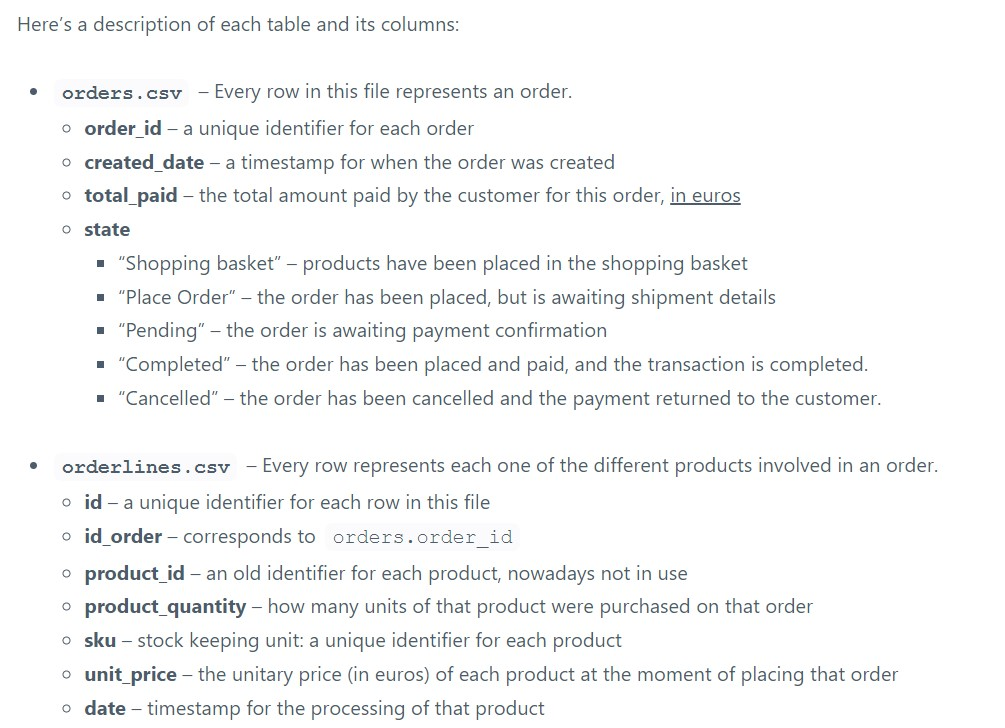

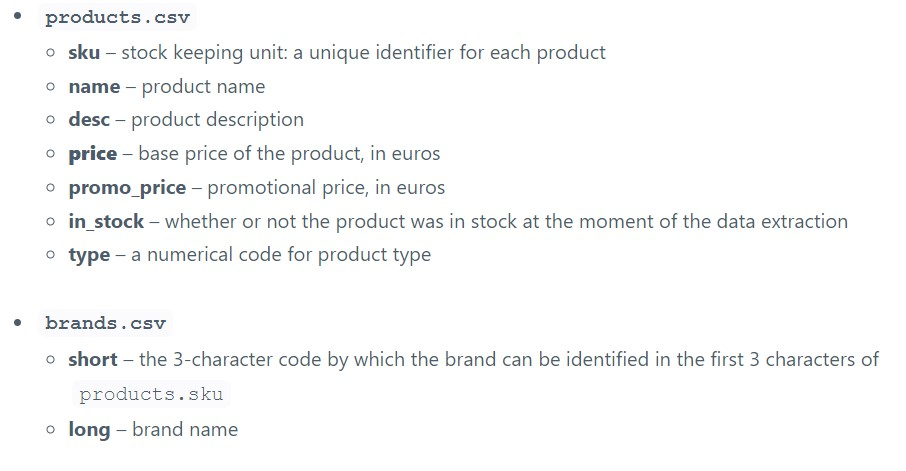

In [ ]:
import pandas as pd

In [ ]:
# Uploaded csv files for Google Colab
url = "https://drive.google.com/file/d/1HAl8d8bgn6INOiRXEKhEuP3ZNP-ZjeaL/view?usp=sharing" # orders.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders = pd.read_csv(path)

url = "https://drive.google.com/file/d/1tVqbTY-mSrvvCKkBXpuzvZknRp5R4mL6/view?usp=sharing" # orderlines.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines = pd.read_csv(path)

url = "https://drive.google.com/file/d/1KI6-LwvgqBVHlOjWicCNQa5nLj4kC7nL/view?usp=sharing" # products.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products = pd.read_csv(path)

url = "https://drive.google.com/file/d/13637cI9pJS-rYTA_35QenXYvqsDKSPyY/view?usp=sharing" # brands.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

# Orders Table


In [ ]:
orders

In [ ]:
# Check for Duplicates.We have no duplicate rows
orders.duplicated().sum()

In [ ]:
# Check info of table
orders.info()

In [ ]:
# Missing Values
orders.total_paid.isna().sum()

In [ ]:
# total_paid has 5 missing values. we will simply delete these rows, as we have enough data without them.
orders = orders.loc[~orders.total_paid.isna(), :]
orders

In [ ]:
# created_date should become datetime datatype
orders["created_date"] = pd.to_datetime(orders["created_date"])
orders

# Orderslines Table


In [ ]:
orderlines

In [ ]:
# Check for Duplicates. We have no duplicate rows
orderlines.duplicated().sum()

In [ ]:
# Check info of table
orderlines.info()

In [ ]:
# date should become datetime datatype
orderlines["date"] = pd.to_datetime(orderlines["date"])

In [ ]:
# unit price must be float datatype
two_dot_order_ids_list = orderlines.loc[orderlines.unit_price.str.contains("\d+\.\d+\.\d+"), "id_order"]
orderlines = orderlines.loc[~orderlines.id_order.isin(two_dot_order_ids_list)]
orderlines["unit_price"] = pd.to_numeric(orderlines["unit_price"])

In [ ]:
# Drop coloumn
orderlines = orderlines.drop(columns = "product_id")

# Products Table


In [ ]:
# Look for Duplicates
products.duplicated().sum()

8746

In [ ]:
# Check info of table
products.info()

In [ ]:
# See Duplicate Values
duplicates = products.duplicated()
products[duplicates].tail(50)

In [ ]:
# dropping ALL duplicate values based on SKU
products.drop_duplicates(subset="sku",keep='first', inplace=True)

In [ ]:
#we have missing values in desc
products["desc"].isna().sum()
products.loc[products['desc'].isna(), :]
#products names here are quite descriptive we copy them to the description colum
products.loc[products['desc'].isna(), 'desc'] = products.loc[products['desc'].isna(), 'name']

In [ ]:
#The missing values in price are 0.43% of all rows in the DataFrame
# simply delete these rows to ensure that we can trust the numbers in our final DataFrame.
products = products.loc[~products['price'].isna()]

In [ ]:
# Problem of 3  for decimal places for price coloumn.
products = products.loc[(~products.price.astype(str).str.contains("\d+\.\d+\.\d+"))&(~products.price.astype(str).str.contains("\d+\.\d{3,}")), :]
# convert the column to a numeric datatype
products["price"] = pd.to_numeric(products["price"])

In [ ]:
# Problem of 3  for decimal places for promo coloumn.

products['promo_price_new'] = products['promo_price'].str.split('.',2)#.str[0-1]
# remove small number of prices with two dots.
products = products.loc[(~products.price.astype(str).str.contains("\d+\.\d+\.\d+"))&(~products.price.astype(str).str.contains("\d+\.\d{3,}")), :]
# create new price as integer
products['price_new'] = products['price'].astype(float).astype(int)
# define length of price_new
products['price_new_len'] = products['price_new'].astype(float).astype(int).astype(str).apply(len)
# define length of price_new
products['promo_price_new'] = products.apply(lambda x: x["promo_price"][ : x.price_new_len ], axis=1)
# drop temporary columns
products.drop(columns=['price_new_len'], axis=1, inplace = True)
# create new promo price
products['promo_price_new'] = products['promo_price_new'].astype(float).astype(int)
# create discount column
products['discount'] = (products.price_new - products.promo_price_new).astype(int)

In [ ]:
# convert the column to a numeric datatype
products["price"] = pd.to_numeric(products["price"])
products['discount'] = pd.to_numeric(products['discount'])

# Brand Table


In [ ]:
# Check info of table
brands.info()

In [ ]:
# Look for Duplicates
brands.duplicated().sum()

# Date times

Changing dates to the `datetime` data type allows us to manipulate and check our data in a similar way.

In [ ]:
# Before we begin, we'll make a copy of the orders_cl DataFrame.
orders_df = orders.copy()
orderlines_df = orderlines.copy()
orders_df["created_date"] = pd.to_datetime(orders_df["created_date"])
orderlines_df["date"] = pd.to_datetime(orderlines_df["date"])

In [ ]:
orderlines_df.info()

# Pareto principle
The Pareto principle states that for many outcomes, roughly 80% of consequences come from 20% of causes (the "vital few").

Applying this principle we extract only Apple and Refurbished Apple data from the dataset. Since the company is based on apple products and its accesiories we consider this data.


In [ ]:
orderlines_qu_copy = orderlines_df.copy()

In [ ]:
orders_qu = orders_df.copy()

In [ ]:
orderlines_qu_copy

In [ ]:
# Delete product id coloumn
del orderlines_qu_copy['product_id']

In [ ]:
# Converting date time datatype
orderlines_qu_copy["date"] = pd.to_datetime(orderlines_qu_copy["date"])

In [ ]:
# Select only apple products
orderlines_qu_copy = orderlines_qu_copy[(orderlines_qu_copy["sku"].str.startswith('APP', na=False))| (orderlines_qu_copy["sku"].str.startswith('AP2', na=False))]

In [ ]:
orderlines_qu_copy = orderlines_qu_copy.rename(columns={"id_order": "order_id"})

In [ ]:
merged_od = pd.merge(orders_qu, orderlines_qu_copy, on="order_id", how="inner")

In [ ]:
# Delete coloumn
del merged_od['total_paid']
del merged_od['order_id']
del merged_od['product_id']
del merged_od['product_quantity']
del merged_od['date']
del merged_od['id']

In [ ]:
merged_od

In [ ]:
products_cl

In [ ]:
# Select only apple products
products_app = products_cl[(products_cl["sku"].str.startswith('APP', na=False))| (products_cl["sku"].str.startswith('AP2', na=False))]

In [ ]:
# Delete in_stock,type coloumn
del products_app['in_stock']

In [ ]:
del products_app['desc']

In [ ]:
# Add new couloum Brand name
from io import StringIO
products_app['Brand'] = products_app['sku'].str.slice(0, 3)

In [ ]:
# Replacing column values
products_app.Brand.replace(['APP', 'AP2'], ["Apple", "R_Apple"], inplace=True)

In [ ]:
products_app

In [ ]:
# final table
merged_apple = pd.merge(merged_od, products_app, on="sku", how="inner")

In [ ]:
merged_apple

In [ ]:
# Discount
merged_apple["discount"] = merged_apple["price"] - merged_apple["unit_price"]

In [ ]:
# Adding Date Data type
merged_apple["date"] = pd.to_datetime(merged_apple["created_date"])

In [ ]:
merged_apple.info()

In [ ]:
import numpy as np
merged_apple['type'] = merged_apple['type'].replace('', np.nan)

In [ ]:
merged_apple.type.replace('',np.nan,regex = True)

In [ ]:
# del
del merged_apple['created_date']

In [ ]:
# final order of table
merged_apple = merged_apple[['name',"Brand","date",'type',"state","price","unit_price","discount"]]

In [ ]:
from google.colab import files

merged_apple.to_csv("merged_apple.csv", index=False)
files.download("merged_apple.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>